**Trend Plot**

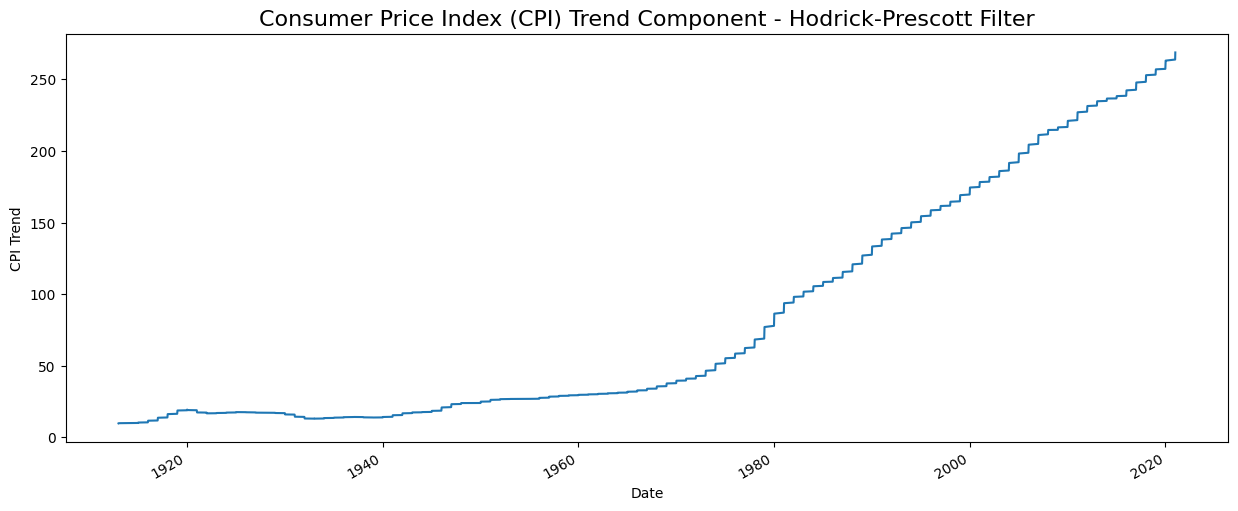

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt  # Import matplotlib for plotting

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv', index_col=0, parse_dates=True)
CPI_cycle, CPI_trend = hpfilter(df['CPI'], lamb=1600)

plt.figure(figsize=(15,6))
CPI_trend.plot()
plt.title('Consumer Price Index (CPI) Trend Component - Hodrick-Prescott Filter', fontsize=16)
plt.xlabel('Date')
plt.ylabel('CPI Trend')
plt.show()

**Detrending using Pandas Deffierencing**

<ipython-input-3-32931435aad0>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Text(0.5, 0, 'Year')

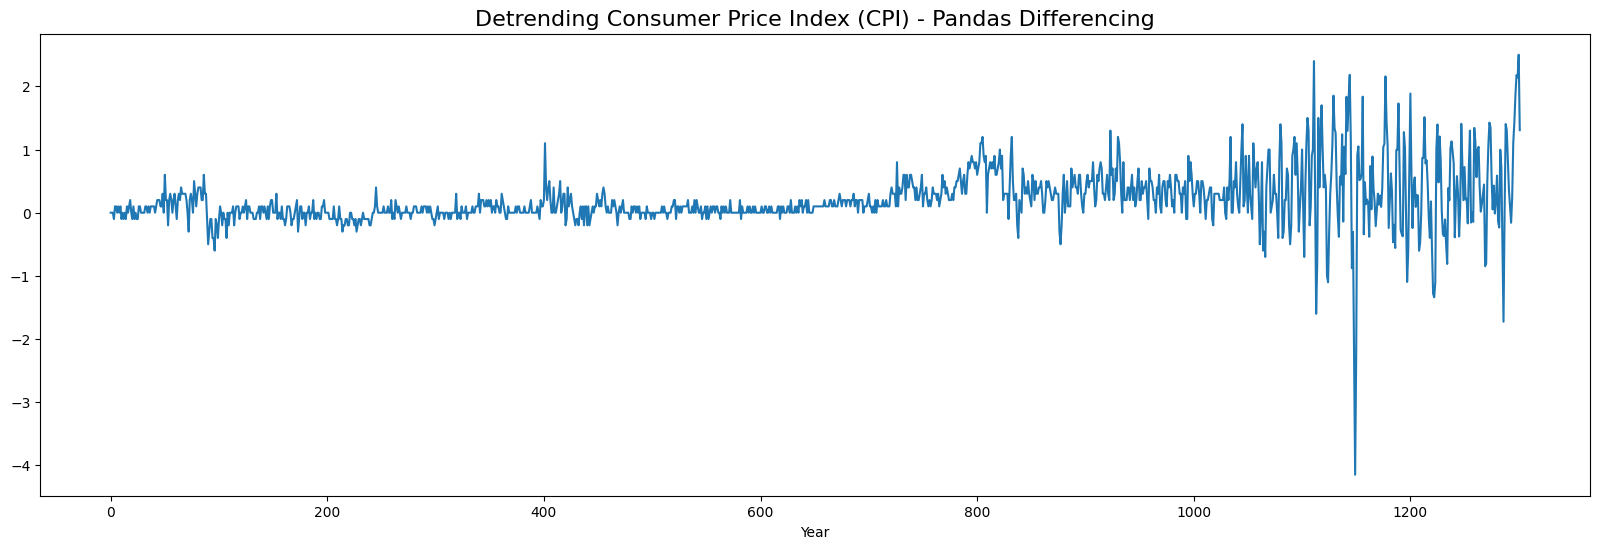

In [ ]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

series = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv', index_col=0, parse_dates=True)
X = series.values
diff = list()
for i in range(1, len(X)):
  value = X[i] - X[i - 1]
  diff.append(value)

plt.figure(figsize=(20,6))
plt.plot(diff)
plt.title('Detrending Consumer Price Index (CPI) - Pandas Differencing', fontsize=16)
plt.xlabel('Year')

**Detrending using SciPy**

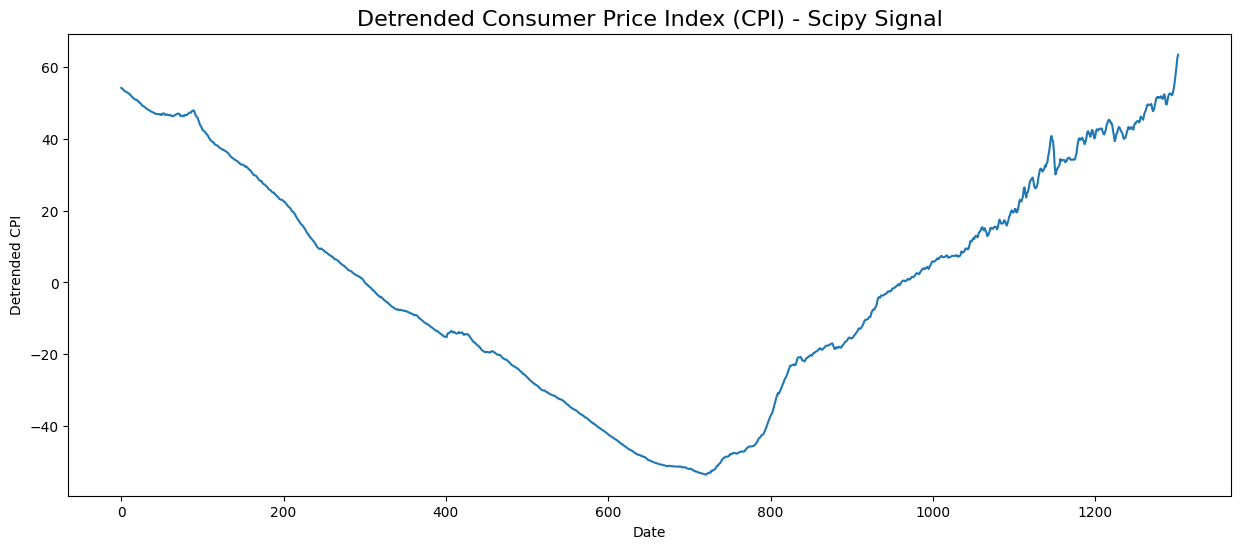

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv', index_col=0, parse_dates=True)
detrended = signal.detrend(df.CPI.values)

plt.figure(figsize=(15, 6))
plt.plot(detrended)
plt.xlabel('Date')
plt.ylabel('Detrended CPI')
plt.title('Detrended Consumer Price Index (CPI) - Scipy Signal', fontsize=16)
plt.show()

**Detrending using HP filter**

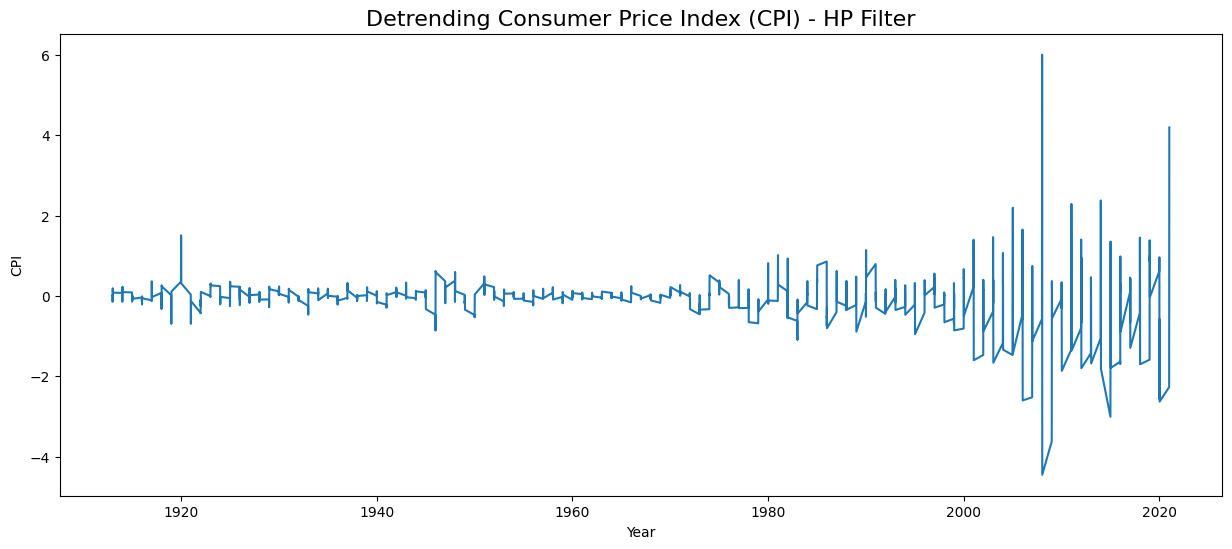

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv',index_col=0,parse_dates=True)
CPI_cycle,CPI_trend = hpfilter(df['CPI'], lamb=1600)
df['trend'] = CPI_trend
detrended = df.CPI - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending Consumer Price Index (CPI) - HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.filters.hp_filter import hpfilter

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv")
df.head()

,Dates,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

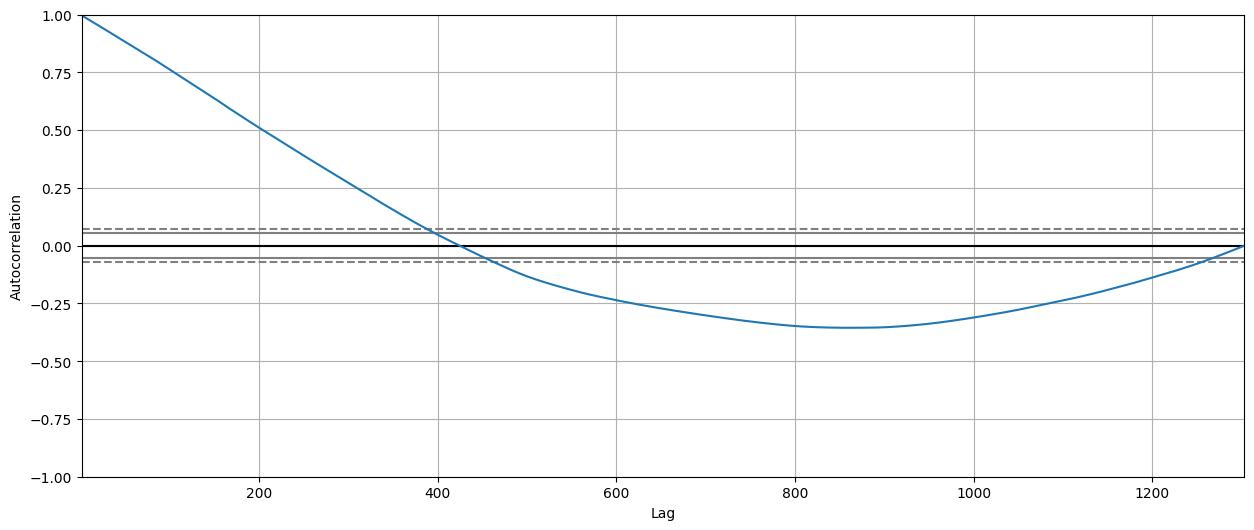

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.CPI.tolist())

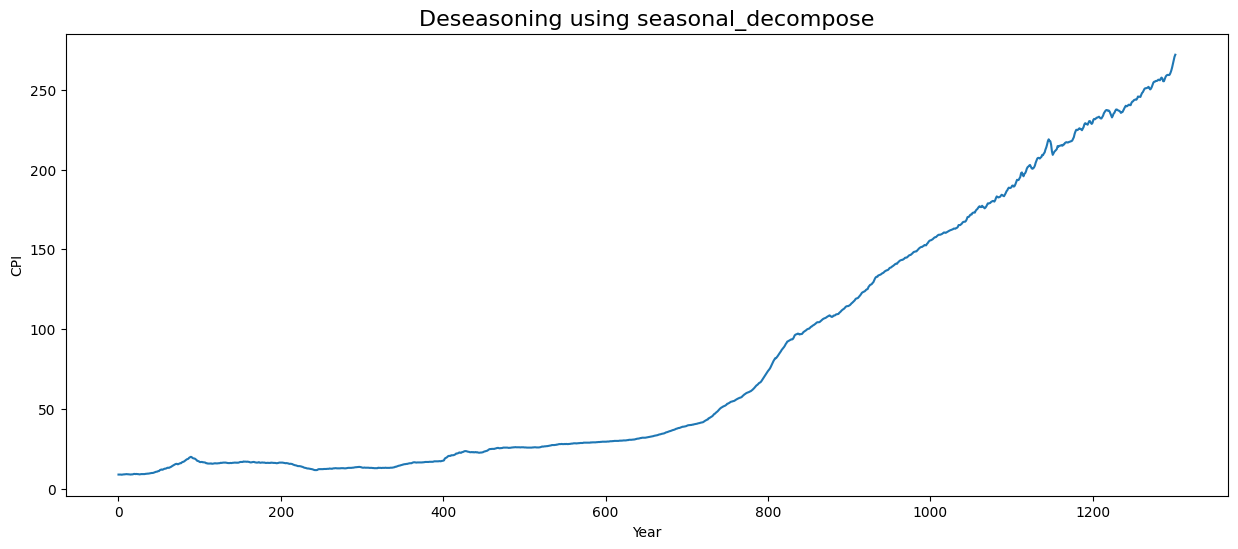

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['CPI'], model='multiplicative', period=12)
deseason = df['CPI'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

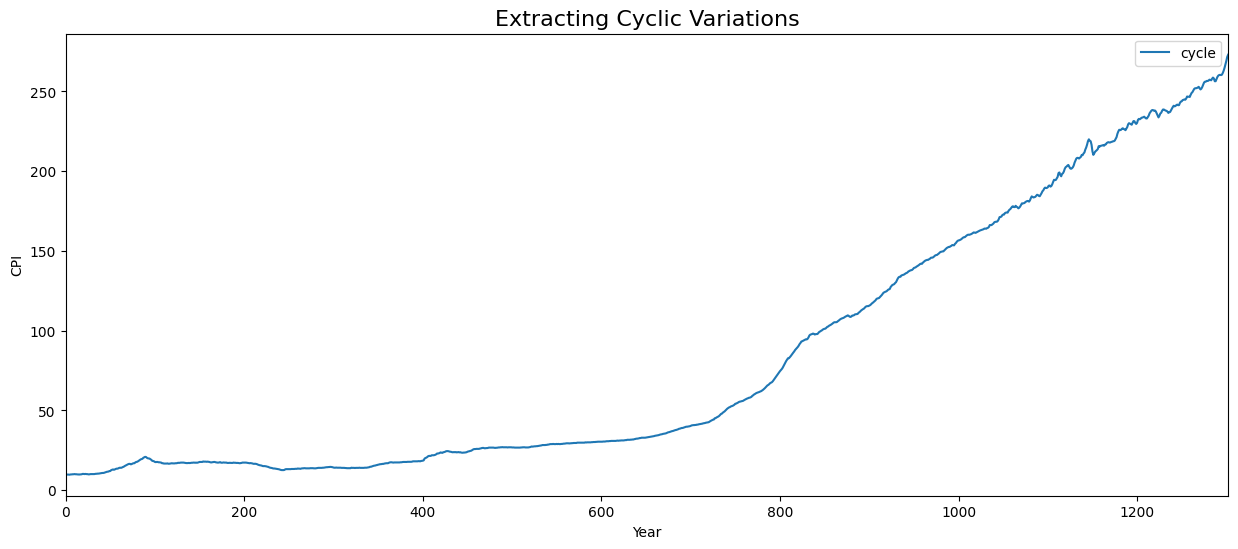

In [ ]:
df['cycle'] = df['CPI']
df['trend'] = df['CPI']
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

**Filters**

In [ ]:
df.agg({'CPI': ['count','min', 'max', 'mean']})

,CPI
count,1303.000000
min,9.700000
max,273.003000
mean,82.638309


In [ ]:
threshold = 10
filtered_df = df[df['CPI'] > threshold]
print(len(filtered_df))

1282


In [ ]:
threshold = 250
filtered_df = df[df['CPI'] > threshold]
filtered_df['Dates'] = pd.to_datetime(filtered_df['Dates'])
grouped_df = filtered_df.groupby(filtered_df['Dates'].dt.year)['CPI'].mean()
print(grouped_df)

Dates
2018    251.874444
2019    255.657417
2020    258.811167
2021    267.203000
Name: CPI, dtype: float64


In [ ]:
lower_threshold = 200
upper_threshold = 250
filtered_df = df[(df['CPI'] > lower_threshold) & (df['CPI'] < upper_threshold)]
print(len(filtered_df))

144


**Simple Exponential Smoothing**


In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv')

In [ ]:
df.head()

,Dates,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [ ]:
X = df['CPI']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 62495.83993519999
MAE is : 249.9444
RMSE is : 249.99167973194625
MAPE is : 96.22576906091854
R2 is : -2643.001050150359

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 127.39943521929072
MAE is : 10.186392461479716
RMSE is : 11.287135828866893
MAPE is : 3.8888211074072294
R2 is : -4.3898666032432025

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 93.37692569567162
MAE is : 8.351052739365956
RMSE is : 9.663173686510639
MAPE is : 3.181984784659584
R2 is : -2.9504819817632506

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 87.53089638017391
MAE is : 7.993375541044842
RMSE is : 9.355794802162663
MAPE is : 3.044234136893511
R2 is : -2.703154997032547

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 87.0665975076041
MAE is : 7.964279858694327
RMSE is : 9.33094837128596
MAPE is : 3.033028644595449
R2 is : -2.683511982266587

Fitting for

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

,smoothing parameter,RMSE
4,0.4,9.330948
3,0.3,9.355795
5,0.5,9.369500
10,1.0,9.389158
6,0.6,9.409957
9,0.9,9.422588
7,0.7,9.434425
8,0.8,9.438518
2,0.2,9.663174
1,0.1,11.287136


In [ ]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 88.15629360000015
MAE is : 8.032400000000012
RMSE is : 9.389158300934124
MAPE is : 3.0592634552985625
R2 is : -2.7296135726384785



In [ ]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 88.15629371466518
MAE is : 8.032400007137669
RMSE is : 9.38915830704037
MAPE is : 3.059263458047458
R2 is : -2.7296135774895927



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1273
Model:,SimpleExpSmoothing,SSE,266.541
Optimized:,True,AIC,-1986.468
Trend:,None,BIC,-1976.170
Seasonal:,None,AICC,-1986.437
Seasonal Periods:,None,Date:,"Thu, 16 Nov 2023"
Box-Cox:,False,Time:,09:56:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,9.8000000,l.0,False


In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1273, 1303)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1273, 1303)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

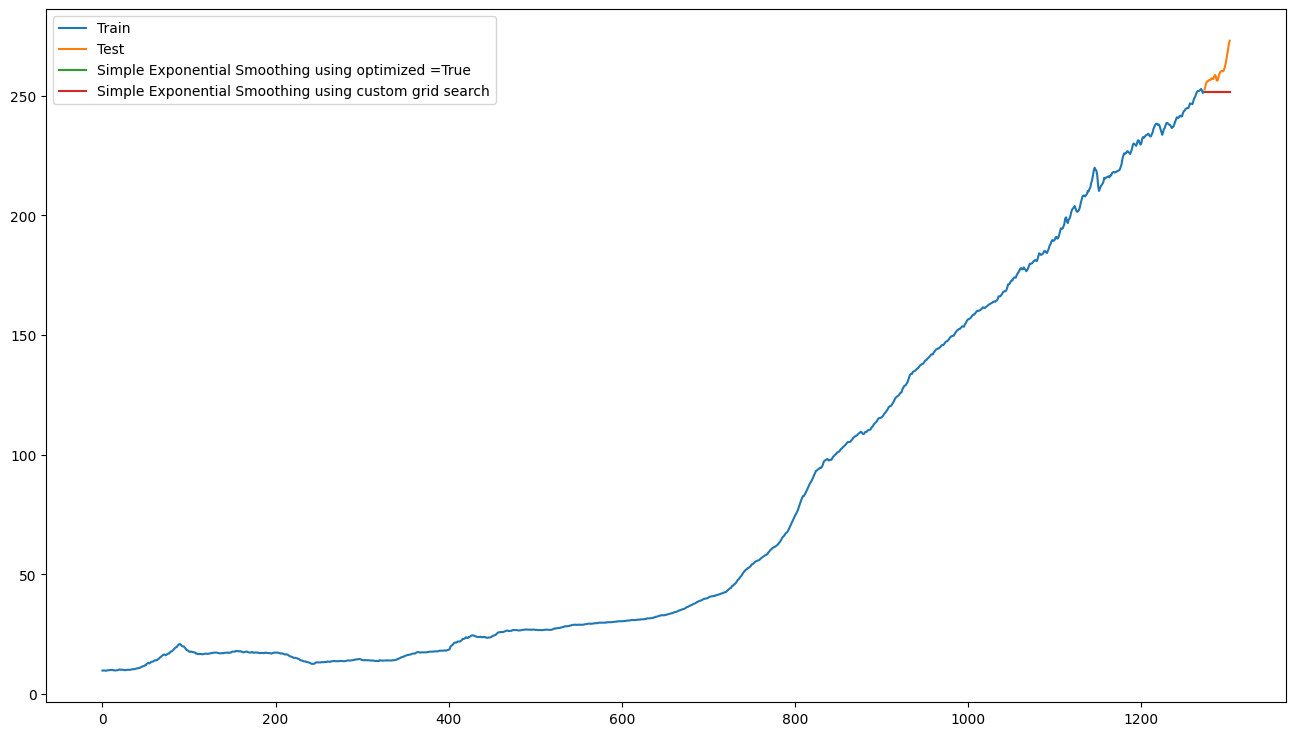

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

**Double Exponential Smoothing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv')
df.head()

,Dates,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [ ]:
df['CPI'] = df['CPI']

In [ ]:
train = df.CPI[0:-30]
test = df.CPI[-30:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Streaming output truncated to the last 5000 lines.
1289    258.289130
1290    258.576030
1291    258.862931
1292    259.149832
1293    259.436732
1294    259.723633
1295    260.010534
1296    260.297434
1297    260.584335
1298    260.871236
1299    261.158136
1300    261.445037
1301    261.731938
1302    262.018839
dtype: float64
 RMSE is 3.4877930681029885
0.2 0.3 0.8 False
1273    253.560788
1274    253.713231
1275    253.865674
1276    254.018118
1277    254.170561
1278    254.323004
1279    254.475448
1280    254.627891
1281    254.780334
1282    254.932777
1283    255.085221
1284    255.237664
1285    255.390107
1286    255.542550
1287    255.694994
1288    255.847437
1289    255.999880
1290    256.152323
1291    256.304767
1292    256.457210
1293    256.609653
1294    256.762096
1295    256.914540
1296    257.066983
1297    257.219426
1298    257.371869
1299    257.524313
1300    257.676756
1301    257.829199
1302    257.981642
dtype: float64
 RMSE is 5.468323743936516
0.2 0.4 0.

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
738,0.2,0.1,0.1,False,2.475536,0.740732


In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

Dep. Variable:,CPI,No. Observations:,1273
Model:,Holt,SSE,201.825
Optimized:,False,AIC,-2336.525
Trend:,Additive,BIC,-2315.928
Seasonal:,None,AICC,-2336.458
Seasonal Periods:,None,Date:,"Thu, 16 Nov 2023"
Box-Cox:,False,Time:,09:56:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 112.38282683391705
MAE is : 9.144698391152975
RMSE is : 10.601076682767513
MAPE is : 3.4841314141488278
R2 is : -3.7545614632244035



In [ ]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

Dep. Variable:,CPI,No. Observations:,1273
Model:,Holt,SSE,184.016
Optimized:,True,AIC,-2454.122
Trend:,Additive,BIC,-2433.526
Seasonal:,None,AICC,-2454.056
Seasonal Periods:,None,Date:,"Thu, 16 Nov 2023"
Box-Cox:,False,Time:,09:56:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.6756034,beta,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 59.01359155979727
MAE is : 6.482005377270267
RMSE is : 7.6820304321056465
MAPE is : 2.4675607991881803
R2 is : -1.4966781504022202



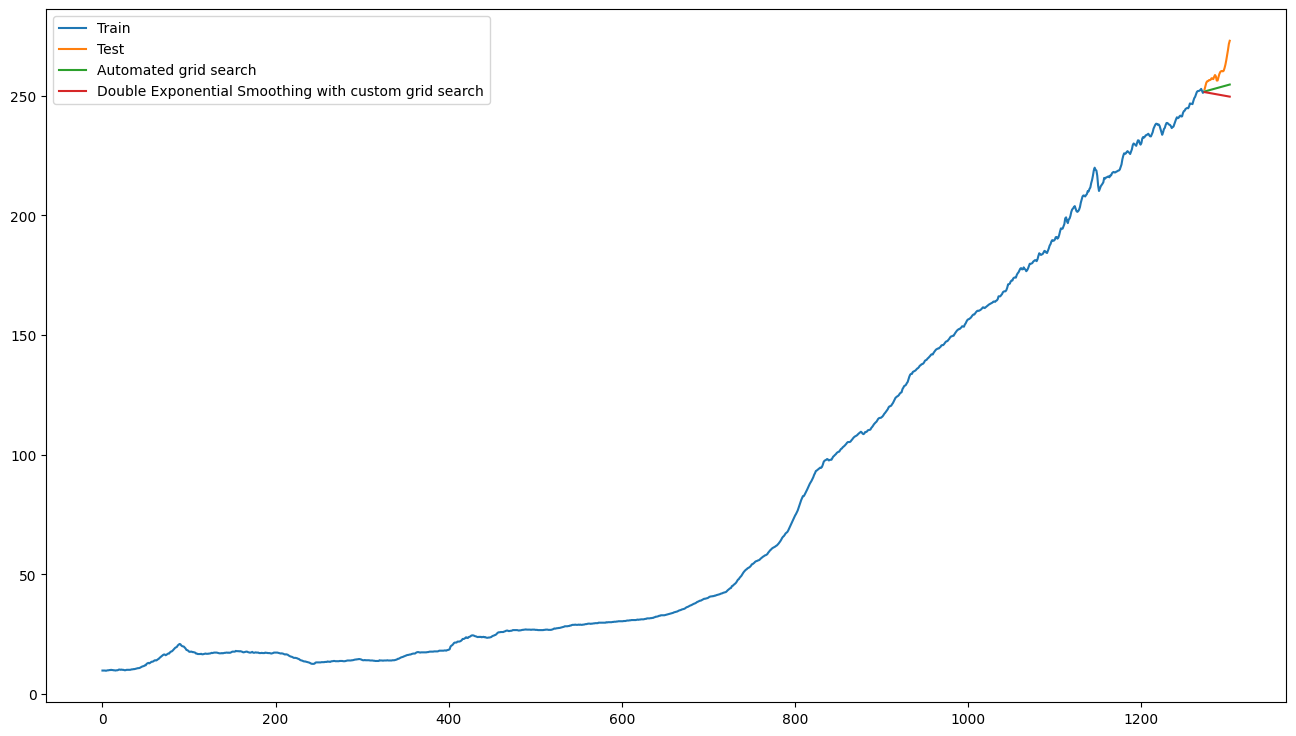

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

**Triple Exponential Smoothing**

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from sklearn.model_selection import ParameterGrid

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/TSA CODE/US CPI.csv')
df.head()

,Dates,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [ ]:
X = df['CPI']
test = X.iloc[-30:]
train = X.iloc[:-30]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],
              'seasonal' :['add', 'mul'],
              'seasonal_periods':[3,6,12],
              'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damped' : [True, False],
              'use_boxcox':[True, False],
              'remove_bias':[True, False],
              'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['trend', 'seasonal_periods', 'damped', 'use_boxcox', 'use_basinhopping', 'RMSE', 'r2'])
start = timer()
print('Starting Grid Search..')
for a, b in enumerate(pg):
    trend = b.get('trend')
    seasonal_periods = b.get('seasonal_periods')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    use_basinhopping = b.get('use_basinhopping')

    model = ExponentialSmoothing(train, trend=trend, damped=damped, seasonal_periods=seasonal_periods, use_boxcox=use_boxcox)

    fit1 = model.fit(smoothing_level=smoothing_level,
                     smoothing_slope=smoothing_slope,
                     damping_slope=damping_slope,
                     optimized=False)

    z = fit1.forecast(30)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)

    df_results_moni = df_results_moni.append({'trend': trend, 'seasonal_periods': seasonal_periods,
                                              'damped': damped, 'use_boxcox': use_boxcox,
                                              'use_basinhopping': use_basinhopping,
                                              'RMSE': RMSE, 'r2': r2}, ignore_index=True)

print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

Starting Grid Search..


Streaming output truncated to the last 5000 lines.
<ipython-input-22-4b5e511a211a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'trend': trend, 'seasonal_periods': seasonal_periods,
<ipython-input-22-4b5e511a211a>:23: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'trend': trend, 'seasonal_periods': seasonal_periods,
<ipython-input-22-4b5e511a211a>:11: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(train, trend=trend, damped=damped, seasonal_periods=seasonal_periods, use_boxcox=use_boxcox)
<ipython-input-22-4b5e511a211a>:13: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 

End of Grid Search
 Total time taken to complete grid search in seconds: 5692.4784082179995


<ipython-input-22-4b5e511a211a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'trend': trend, 'seasonal_periods': seasonal_periods,
<ipython-input-22-4b5e511a211a>:23: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'trend': trend, 'seasonal_periods': seasonal_periods,
<ipython-input-22-4b5e511a211a>:11: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(train, trend=trend, damped=damped, seasonal_periods=seasonal_periods, use_boxcox=use_boxcox)
<ipython-input-22-4b5e511a211a>:13: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = model.fit(smoothing_level=smoothing_level,
/usr/l

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,trend,seasonal_periods,damped,use_boxcox,use_basinhopping,RMSE,r2
69985,add,3,False,False,True,2.71561,0.688007


In [ ]:
df_results_moni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139968 entries, 0 to 139967
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trend             139968 non-null  object 
 1   seasonal_periods  139968 non-null  object 
 2   damped            139968 non-null  object 
 3   use_boxcox        139968 non-null  object 
 4   use_basinhopping  139968 non-null  object 
 5   RMSE              139968 non-null  float64
 6   r2                139968 non-null  float64
dtypes: float64(2), object(5)
memory usage: 7.5+ MB


In [ ]:
fit1 = ExponentialSmoothing(train, trend='mul', damped=False, seasonal_periods=3, use_boxcox=False).fit(smoothing_level=0.9,
                                                                                            smoothing_slope=0.6,
                                                                                            damping_slope=0.6,
                                                                                            optimized=False,
                                                                                            method='Powell')
Forecast_custom_pred = fit1.forecast(30)
fit1.summary()


<ipython-input-25-f2fa75d85afa>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(train, trend='mul', damped=False, seasonal_periods=3, use_boxcox=False).fit(smoothing_level=0.9,
<ipython-input-25-f2fa75d85afa>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = ExponentialSmoothing(train, trend='mul', damped=False, seasonal_periods=3, use_boxcox=False).fit(smoothing_level=0.9,
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


Dep. Variable:,CPI,No. Observations:,1273
Model:,ExponentialSmoothing,SSE,202.180
Optimized:,False,AIC,-2334.284
Trend:,Multiplicative,BIC,-2313.687
Seasonal:,None,AICC,-2334.218
Seasonal Periods:,None,Date:,"Thu, 16 Nov 2023"
Box-Cox:,False,Time:,13:17:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 111.92405342305928
MAE is : 9.12563077631977
RMSE is : 10.579416497286571
MAPE is : 3.476859364451765
R2 is : -3.735152213243177



In [ ]:
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [ ]:
fitESAUTO.summary()

Dep. Variable:,CPI,No. Observations:,1273
Model:,ExponentialSmoothing,SSE,266.541
Optimized:,True,AIC,-1986.468
Trend:,None,BIC,-1976.170
Seasonal:,None,AICC,-1986.437
Seasonal Periods:,None,Date:,"Thu, 16 Nov 2023"
Box-Cox:,False,Time:,13:17:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,9.7999998,l.0,True


In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 88.15629371796585
MAE is : 8.03240000734313
RMSE is : 9.38915830721614
MAPE is : 3.059263458126585
R2 is : -2.729613577629234



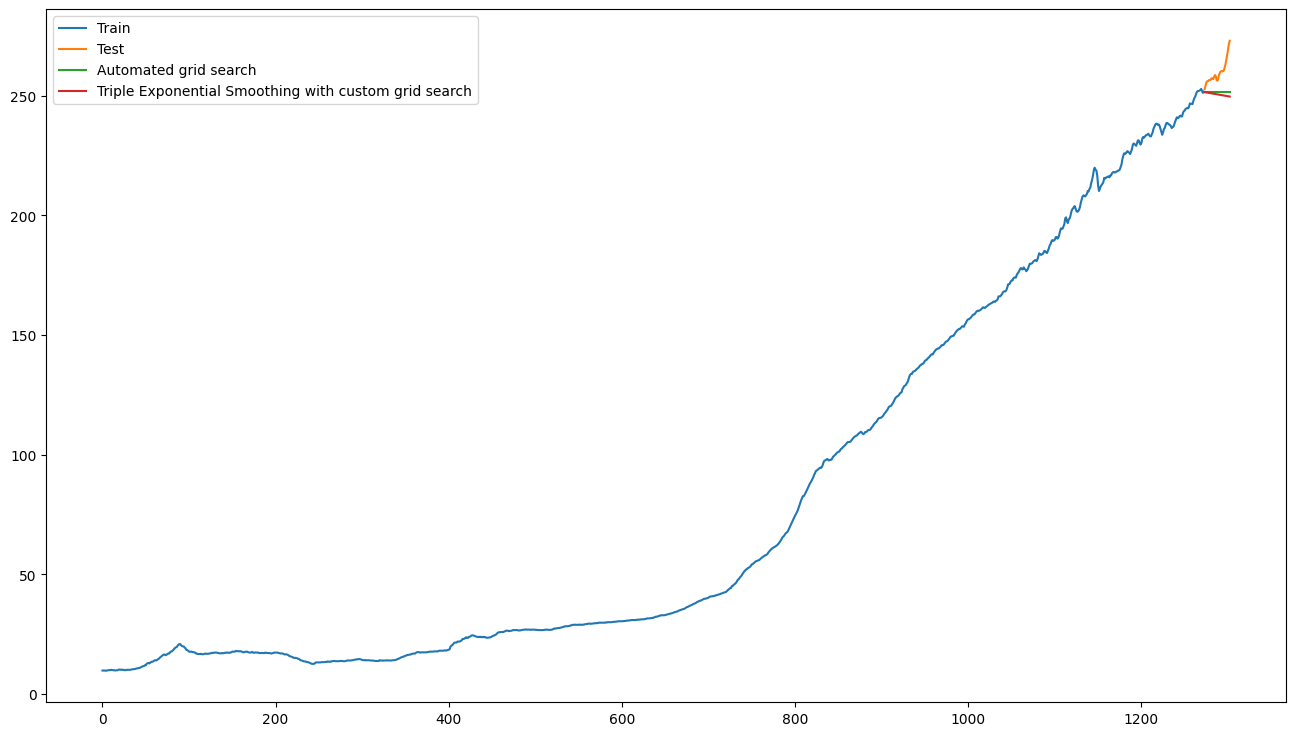

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()